In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import seaborn as sb
import anndata as ad
import pandas as pd

In [2]:
df2  = pd.read_csv("I:\\mutiomics\\ICC\\BQ-SXT20240702-空代50um-1-沈晓天-检测分析交付\\04\\04.csv")
last_column = df2.iloc[:, -1]
df2 = df2.drop(df2.columns[-1], axis=1)
df2_loc = last_column.str.split(',', expand=True)
df2_loc.index = df2_loc.index.astype(str)
df2_loc = df2_loc.to_numpy(dtype=int)
df2_loc=pd.DataFrame(df2_loc)

In [3]:
df2_loc

,0,1
0,23,1
1,24,1
2,25,1
3,26,1
4,27,1
...,...,...
15034,66,259
15035,67,259
15036,68,259
15037,69,259


In [4]:
x_coords = df2_loc[0].astype(int)
y_coords = df2_loc[1].astype(int)
x_min, x_max = x_coords.min(), x_coords.max()
y_min, y_max = y_coords.min(), y_coords.max()
x_range = x_max - x_min
y_range = y_max - y_min
# 判断是否为正方形
if x_range != y_range:
    print(f"坐标范围不构成正方形，x范围: {x_range}, y范围: {y_range}")
    
    # 找到较大的范围
    max_range = max(x_range, y_range)
    
    # 调整 x 或 y 范围
    if x_range < max_range:
        # 扩展 x 坐标范围
        delta = (max_range - x_range) // 2
        x_coords = x_coords + delta
    else:
        # 扩展 y 坐标范围
        delta = (max_range - y_range) // 2
        y_coords = y_coords + delta

    # 更新后的 DataFrame
    df2_loc = pd.DataFrame({0: x_coords, 1: y_coords})
    print("已调整为正方形范围！")
else:
    print("坐标范围已构成正方形，无需调整。")
rotation_angle = np.radians(45)
rotation_matrix = np.array([
    [np.cos(rotation_angle), -np.sin(rotation_angle)],
    [np.sin(rotation_angle), np.cos(rotation_angle)],
])
rotated_coords = np.dot( df2_loc.to_numpy(), rotation_matrix.T)

# 更新为旋转后的坐标
df2_loc = pd.DataFrame(rotated_coords, columns=["x", "y"])

坐标范围不构成正方形，x范围: 93, y范围: 259
已调整为正方形范围！


In [5]:
df3  = pd.read_csv("I:\\mutiomics\\ICC\\BQ-SXT20240702-空代50um-1-沈晓天-检测分析交付\\03\\03.csv")
last_column = df3.iloc[:, -1]
df3 = df3.drop(df3.columns[-1], axis=1)
df3_loc = last_column.str.split(',', expand=True)
df3_loc.index = df3_loc.index.astype(str)
df3_loc = df3_loc.to_numpy(dtype=int)

df4  = pd.read_csv("I:\\mutiomics\\ICC\\BQ-SXT20240702-空代50um-1-沈晓天-检测分析交付\\04\\04.csv")
last_column = df4.iloc[:, -1]
df4 = df4.drop(df4.columns[-1], axis=1)
df4_loc = last_column.str.split(',', expand=True)
df4_loc.index = df4_loc.index.astype(str)
df4_loc = df4_loc.to_numpy(dtype=int)

In [6]:
columns_equal = df3.columns.equals(df4.columns)

# 输出结果
if columns_equal:
    print("df3 和 df4 的列名是一样的。")
else:
    print("df3 和 df4 的列名不一样。")

df3 和 df4 的列名是一样的。


In [7]:
columns_equal = df2.columns.equals(df4.columns)

# 输出结果
if columns_equal:
    print("df2 和 df4 的列名是一样的。")
else:
    print("df2 和 df4 的列名不一样。")

df2 和 df4 的列名不一样。


In [8]:
common_columns = df3.columns.intersection(df2.columns)
common_columns
df2=df2[common_columns]
df3=df3[common_columns]
df4=df4[common_columns]

In [6]:
df2_trimmed = df2.iloc[:, 1:]
df3_trimmed = df3.iloc[:, 1:]
df4_trimmed = df4.iloc[:, 1:]

# 水平合并
df_combined = pd.concat([df2_trimmed,df3_trimmed, df4_trimmed], axis=0)

# 显示合并后的 DataFrame
print(df_combined)

       122.0002   122.9844   124.0066   125.0092   126.0023   127.0509  \
0      8.191075   0.000000  291.71396   0.000000  12.658934  16.754470   
1      0.000000  17.805311  187.59824  20.375150  28.818907  14.684793   
2      0.000000   0.000000  258.58215   0.000000  33.868748   0.000000   
3      0.000000  13.812459  163.57898   0.000000   8.287476   0.000000   
4      0.000000  12.737118  182.95132   0.000000   9.842319   4.631679   
...         ...        ...        ...        ...        ...        ...   
15034  0.000000  31.278984  589.18976  20.648218  39.865370   4.702069   
15035  8.955638  36.220577  562.61304  28.857054  40.996918   0.000000   
15036  0.000000  32.207634  732.62427  43.142326   0.000000   6.560814   
15037  6.854682  26.007470  596.96216   0.000000  45.563473  14.314189   
15038  0.000000   0.000000  511.09433   0.000000  42.389340   0.000000   

        128.0342   134.0463   134.9845   135.0301  ...  1192.7112  1193.7284  \
0      10.238844  25.131708   0

In [7]:
adata = ad.AnnData(df2)

I:\mutiomics\pythonProject\.venv\lib\site-packages\anndata\utils.py:292: UserWarning: X converted to numpy array with dtype float64
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")
I:\mutiomics\pythonProject\.venv\lib\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [8]:
adata

AnnData object with n_obs × n_vars = 15039 × 2636

I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\preprocessing\_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)
C:\Users\28123\AppData\Local\Temp\ipykernel_4012\1855100078.py:7: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, key_added='clusters')


-----
anndata     0.10.7
scanpy      1.10.1
-----
PIL                         10.3.0
anyio                       NA
arrow                       1.3.0
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
babel                       2.14.0
certifi                     2024.02.02
cffi                        1.16.0
charset_normalizer          3.3.2
colorama                    0.4.6
comm                        0.2.2
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.9.0.post0
debugpy                     1.8.1
decorator                   5.1.1
defusedxml                  0.7.1
exceptiongroup              1.2.1
executing                   2.0.1
fastjsonschema              NA
fqdn                        NA
h5py                        3.11.0
idna                        3.7
igraph                      0.11.4
ipykernel                   6.29.4
ipywidgets                  8.1.2
isoduration                 N

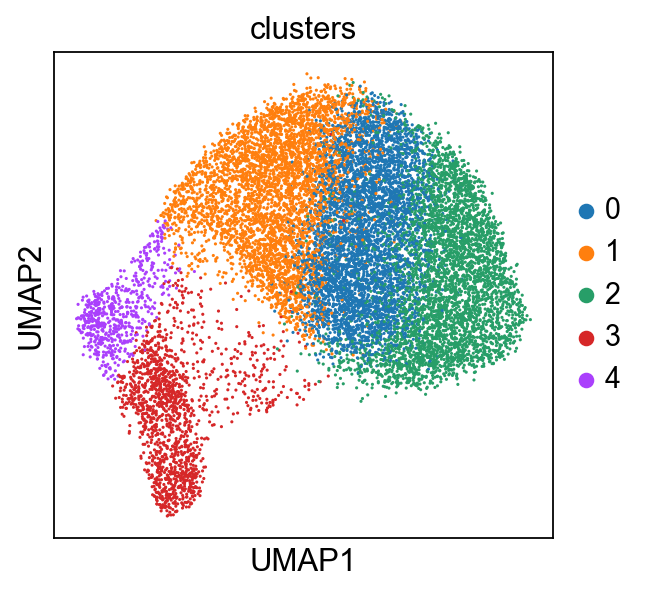

In [9]:
sc.pp.normalize_total(adata, inplace = True,exclude_highly_expressed=False)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=200, inplace=True)
sc.pp.pca(adata, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata,n_neighbors=50)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added='clusters')
plt.rcParams['figure.figsize']=(8,8)
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)
sc.pl.umap(adata, color='clusters', palette=sc.pl.palettes.default_20)

In [32]:
num_ko = df3.shape[0]
num_wt = df4.shape[0]

# 生成 batch 列的内容
batch_column = ['KO'] * num_ko + ['WT'] * num_wt

# 确保 adata.obs 的行数与 batch_column 的长度一致
if len(adata.obs) == len(batch_column):
    # 添加 batch 列到 adata.obs
    adata.obs['batch'] = batch_column
else:
    print("Error: adata.obs 的行数与生成的 batch 列长度不一致")

# 显示 adata.obs 的前几行，确认添加结果
print(adata.obs.head())

Error: adata.obs 的行数与生成的 batch 列长度不一致
  clusters
0        3
1        1
2        3
3        3
4        2


KeyError: 'Could not find key batch in .var_names or .obs.columns.'

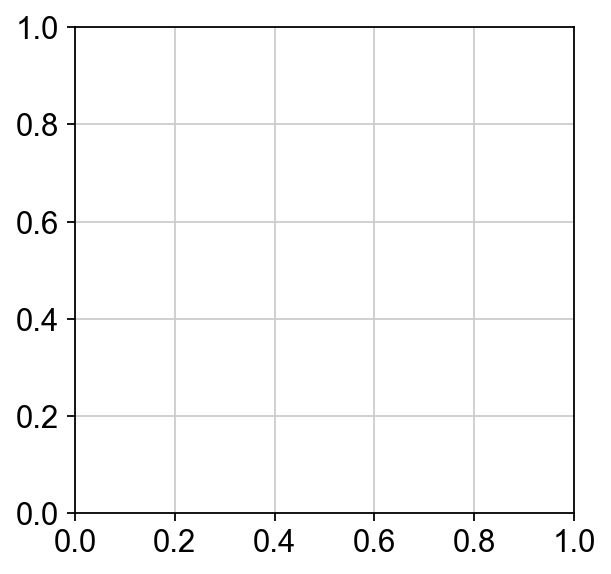

In [10]:
sc.pl.umap(adata, color='batch', palette=sc.pl.palettes.default_20)

In [34]:
pd.DataFrame(df3_loc.values, columns=['x', 'y'])

,x,y
0,26,1
1,27,1
2,28,1
3,29,1
4,30,1
...,...,...
19621,57,191
19622,58,191
19623,59,191
19624,60,191


In [35]:
df2_loc

,x,y
0,72.831998,74.246212
1,73.539105,74.953319
2,71.417785,74.246212
3,72.124892,74.953319
4,72.831998,75.660426
...,...,...
14287,-66.468037,272.943218
14288,-65.760931,273.650324
14289,-65.053824,274.357431
14290,-64.346717,275.064538


In [36]:
adata2 = ad.AnnData(df2_trimmed)
df2_loc = pd.DataFrame(df2_loc)
df2_loc.index = df2_loc.index.astype(str)
adata2.obsm['spatial'] = df2_loc.to_numpy(dtype=int)
adata2.obs=adata.obs

adata3 = ad.AnnData(df3_trimmed)
df3_loc = pd.DataFrame(df3_loc)
df3_loc.index = df3_loc.index.astype(str)
adata3.obsm['spatial'] = df3_loc.to_numpy(dtype=int)
#adata3.obs=adata.obs.iloc[0:num_ko,:]

adata4 = ad.AnnData(df4_trimmed)
df4_loc = pd.DataFrame(df4_loc)
df4_loc.index = df4_loc.index.astype(str)
adata4.obsm['spatial'] = df4_loc.to_numpy(dtype=int)
#adata4.obs=adata.obs.iloc[num_ko:,:]


I:\mutiomics\pythonProject\.venv\lib\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
I:\mutiomics\pythonProject\.venv\lib\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
I:\mutiomics\pythonProject\.venv\lib\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [13]:
adata2.obsm['spatial']

array([[ 74,  75],
       [ 74,  76],
       [ 75,  77],
       ...,
       [-76, 289],
       [-75, 290],
       [-77, 290]])

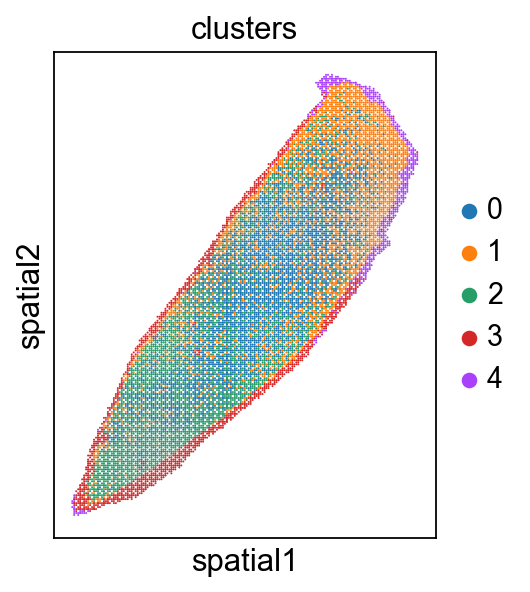

In [14]:
sc.pl.spatial(adata2, img_key = "hires", color="clusters",spot_size=1)

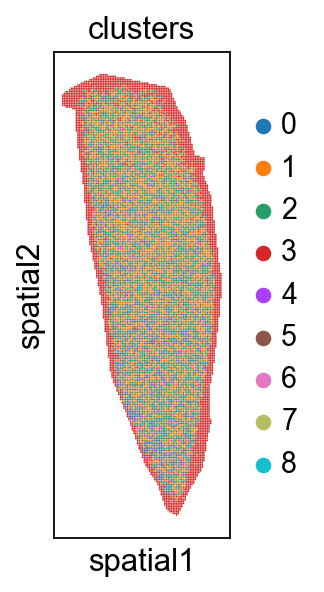

In [214]:
sc.pl.spatial(adata4, img_key = "hires", color="clusters", spot_size=1)

In [15]:
adata2.write("I:\\mutiomics\\ICC\\run2_WT\\ITO_WT1.h5ad")

In [16]:
print(adata2.obs.index)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '15029', '15030', '15031', '15032', '15033', '15034', '15035', '15036',
       '15037', '15038'],
      dtype='object', length=15039)
